# Neural Network Type Classification | TMNIST

## Building a Neural Network for TMNIST Dataset Classification

In this tutorial, I'm going to guide you through the exciting process of developing a neural network model aimed at classifying types within the TMNIST dataset. Utilizing a variety of Python libraries such as pandas, numpy, matplotlib, tensorflow, and keras, we'll cover the entire workflow: from loading and exploring the dataset, to preparing the data for our model, constructing the neural network architecture, training the model, evaluating its performance, and finally, visualizing our results. This guide is particularly suited for beginners in neural network type classification, offering a comprehensive step-by-step approach to creating and analyzing a neural network model tailored to the TMNIST dataset. By the end of this tutorial, you'll not only have built your own model but also learned how to evaluate and present its capabilities effectively.

## *Aim*

- **Importing Essential Libraries**: Setting up our environment with all the necessary tools.
- **Loading the Dataset**: Fetching the dataset from its online repository.
- **Data Exploration**: Diving deep into the dataset to understand its structure and contents.
- **Preparing the Data**: Getting our data ready for the modeling process.
- **Building the Neural Network**: Laying out the architecture of our neural network.
- **Training the Model**: Teaching our model to make accurate predictions.
- **Evaluating the Model**: Assessing the performance of our model.
- **Visualizing the Results**: Graphically representing the performance metrics.
- **Examining Model Classifications**: Analyzing specific cases of how our model classifies test data.

## About the Dataset

The dataset, available on Kaggle, draws inspiration from the MNIST database of handwritten digits but introduces a unique twist by featuring images of digits 0-9 created using 2,990 Google Fonts. It encompasses 29,900 labeled examples along with their respective font names. Each entry consists of 786 elements: the first element specifies the font name (e.g., "Chivo-Italic", "Sen-Bold"), the second element represents the label (a digit from 0-9), and the subsequent 784 elements are the grayscale pixel values (ranging from 0 to 255) of the 28x28 pixel image.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [4]:
df = pd.read_csv('/content/TMNIST_Data.csv')

In [5]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)

In [7]:
df.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting data into train, test and validation sets

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['names', 'labels'], axis=1).values
y = df['labels'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(19136, 784) (19136,)
(5980, 784) (5980,)


I have 19,136 images, each flattened into 784 pixel values, which corresponds to a 28x28 pixel image when reshaped.
For x_test.shape and y_test.shape, I get (5980, 784) and (5980,), respectively. This tells me that my test set consists of 5,980 images, again with each image flattened into an array of 784 pixel values, along with 5,980 labels for evaluating the model.

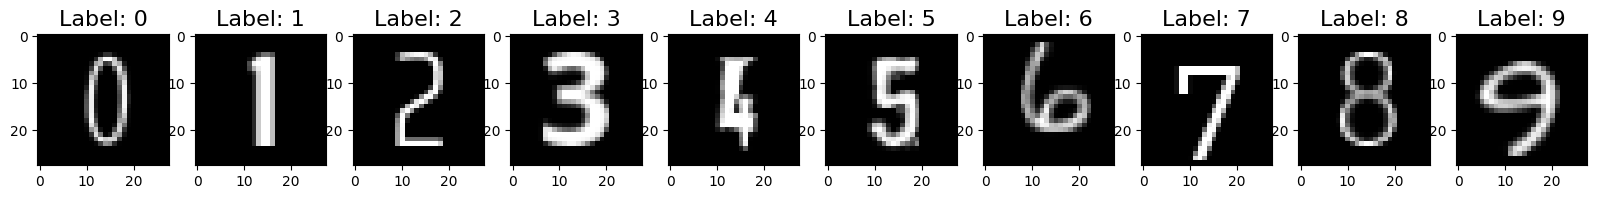

In [10]:
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(num_classes):

    sample_index = np.where(y_train == i)[0][0]

    sample = x_train[sample_index].reshape(28, 28)
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

I'm demonstrating how to visualize sample images from the TMNIST dataset that I'm analyzing. The purpose of this code is to exhibit individual instances of each class (digits 0 through 9) from the dataset.

Here's a detailed explanation of the steps I've taken in my code:

1. **Defining the Number of Classes**: I start by setting the variable `num_classes` to 10, which corresponds to the total number of unique digits (0-9) in the dataset.

2. **Creating a Figure for Visualization**: I then create a plotting area with `plt.subplots()`, specifying that I want a grid of 1 row and `num_classes` columns. I also define the size of this grid with `figsize=(20,20)` to ensure that each of the digits is clearly visible.

3. **Looping Through Classes**: I loop through each class using a `for` loop: `for i in range(num_classes):`. Within this loop, I perform the following actions for each digit `i`:

   - **Finding a Sample**: I use `np.where(y_train == i)[0][0]` to find the index of the first instance in my training labels (`y_train`) where the label matches the current class `i`.
   
   - **Reshaping and Displaying the Image**: With the index, I select the corresponding image from my training set `x_train` and reshape it from a flat array of 784 pixel values back into a 28x28 pixel image. I then display this image in a subplot with `ax[i].imshow(sample, cmap='gray')`, which renders the image in grayscale.

   - **Annotating the Image**: Lastly, I annotate each subplot with the title "Label: i", where `i` is the current digit, using `ax[i].set_title("Label: {}".format(i), fontsize=16)`. This title helps identify which digit each image represents.

The output is a matrix of images depicting the 10 classes of the TMNIST dataset. Each subplot is clearly labeled with its corresponding digit, providing a quick and easy reference to understand the variety of visual representations within the dataset. This visualization is particularly useful to confirm that the dataset contains correctly labeled, diverse examples of each handwritten digit, which is vital for training accurate machine learning models.


In [11]:
for i in range(10):
  print(y_train[i])

3
2
5
4
2
3
0
4
9
9


## Preprocessing Labels for Neural Network Training

I'm performing a crucial preprocessing step known as one-hot encoding on my label data. Here's why and how I'm doing this:

1. **Transforming Class Vectors**: The `to_categorical` function converts the array of class labels in `y_train` and `y_test` from a single integer to an array of zeros except for the position of the class integer, which is marked as '1'. For example, if a label in `y_train` is `3`, and there are 10 classes in total, the one-hot encoded form would look like `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.

2. **Matching Neural Network Output**: My neural network will output probabilities for each class through its final layer, which uses a softmax activation function. The one-hot encoded labels align perfectly with this, allowing me to easily calculate the loss during training by comparing the predicted probability distribution with the true distribution provided by these one-hot encoded vectors.

3. **Facilitating Loss Calculation**: This encoding simplifies the computation of the loss when using categorical crossentropy, which is the loss function I plan to use. It compares the predicted probabilities directly against the true label distribution (the one-hot encoded vectors).

After executing these commands, my `y_train` and `y_test` arrays are no longer just simple integer arrays but rather two-dimensional binary matrices. Each row corresponds to a single image and shows the presence of the class through a '1' in the column that corresponds to the correct class. This step is indispensable for preparing my dataset for an efficient training process with my neural network.


In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


##  Normalizing the pixel values in both the x_train and x_test datasets

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(19136, 784)


## Constructing the Neural Network Model

I've constructed a sequential neural network model using Keras for my TMNIST dataset. Here's a step-by-step explanation of what each part of my code is achieving:

- `model = Sequential()`: This initializes a new sequential model. Sequential models are a linear stack of layers where each layer has exactly one input tensor and one output tensor.

- `model.add(Dense(units=128, input_shape=(784,), activation='relu'))`: Here, I'm adding the first dense (fully connected) layer with 128 neurons. The `input_shape=(784,)` indicates that the model will take an input array of shape 784, which matches the flattened 28x28 images of the dataset. I'm using the ReLU (Rectified Linear Unit) activation function for this layer, which is a common choice for hidden layers.

- `model.add(Dense(units=128, activation='relu'))`: I'm adding a second dense layer, also with 128 neurons and ReLU activation. This is to add depth to the model and enable it to learn more complex patterns in the data.

- `model.add(Dropout(0.25))`: To reduce the chance of overfitting, I'm inserting a dropout layer. Dropout randomly sets a fraction `0.25` of the input units to 0 at each update during training time, which helps to prevent overfitting.

- `model.add(Dense(units=10, activation='softmax'))`: This is the output layer. It has 10 neurons because I have 10 classes to predict, and I'm using the softmax activation function. Softmax will output a probability distribution over the 10 classes for each input.

- `model.compile(...)`: I'm compiling the model with the categorical crossentropy loss function, which is suitable for multi-class classification problems. I've chosen 'adam' as my optimizer, a popular choice that adapts the learning rate during training. I've also specified that I want to track 'accuracy' as a metric during training and evaluation.

- `model.summary()`: This prints a summary representation of my model, showing each layer, its type, output shape, and the number of parameters it has. It's useful to verify the structure of the model and to ensure that the number of trainable parameters is reasonable.



In [16]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


By executing this code, I've effectively defined the architecture of my neural network model and prepared it for the training process with the TMNIST data. The summary shows that I have a total of 118,282 trainable parameters, which is the number of weights the model will update during training in order to minimize the loss function.


## Training the Neural Network

After setting up the architecture of my neural network, it's time to train it using the TMNIST dataset. Here's how I've configured the training process and what the training output means:

- `batch_size = 512`: I'm specifying that the model should be trained using mini-batches of 512 samples at a time. This means that for each iteration of the training process, the network will update the model's weights after processing 512 images.

- `epochs=10`: This defines that the training process should run for 10 complete passes through the entire training dataset.

- `history=model.fit(...)`: Here, I'm calling the `fit` method to train the model. I'm passing my training data (`x_train` for the features and `y_train` for the labels), along with the `batch_size` and `epochs` I've just specified.

The output shown after running the `fit` method indicates the model's performance during training:

- **Epoch 1/10 to Epoch 10/10**: These lines show the progress of the training for each epoch out of the total 10 epochs.

- **38/38**: This indicates that there are 38 steps (or batches) in each epoch, calculated by dividing the total number of samples by the batch size.

- **Time per step**: The time following the dash (e.g., `1s 25ms/step`) tells me how long, on average, it took to process each batch.





In [35]:
batch_size = 512
epochs=10
history=model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
38/38 [==============================] - 1s 25ms/step - loss: 0.0512 - accuracy: 0.9852
Epoch 2/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0406 - accuracy: 0.9880
Epoch 3/10
38/38 [==============================] - 1s 22ms/step - loss: 0.0375 - accuracy: 0.9898
Epoch 4/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0348 - accuracy: 0.9904
Epoch 5/10
38/38 [==============================] - 1s 22ms/step - loss: 0.0328 - accuracy: 0.9912
Epoch 6/10
38/38 [==============================] - 1s 22ms/step - loss: 0.0316 - accuracy: 0.9912
Epoch 7/10
38/38 [==============================] - 1s 20ms/step - loss: 0.0305 - accuracy: 0.9914
Epoch 8/10
38/38 [==============================] - 1s 20ms/step - loss: 0.0281 - accuracy: 0.9926
Epoch 9/10
38/38 [==============================] - 1s 20ms/step - loss: 0.0273 - accuracy: 0.9929
Epoch 10/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0250 - accuracy: 0.9933


Loss and Accuracy: For each epoch, the loss (`loss`) and accuracy (`accuracy`) on the training set are reported.
   - The loss is a numerical value representing the error between the predicted values and the actual values—lower is better. It's good to see this decreasing over time, which suggests that the model is learning.
   - The accuracy is the percentage of images correctly classified by the network during this training epoch. By Epoch 10, my model reached an accuracy of about 99.33%, which indicates that the model is performing very well on the training data.

   
Overall, the training process seems to have gone smoothly, with the loss decreasing and the accuracy increasing over the 10 epochs, which suggests that the model is learning and improving its predictions on the training set. This is a promising sign that the model will be able to generalize and perform well on new, unseen data.

## Evaluating the Model on Test Data

After training my neural network model, the next crucial step is to evaluate its performance on the test dataset to see how well it generalizes to new, unseen data. Here's how I've done it:

- `test_loss, test_acc = model.evaluate(x_test, y_test)`: This line of code evaluates the model on the test set. The `evaluate` function returns the loss value & metrics values (in this case, accuracy) for the model in test mode.

- `print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))`: I'm printing out the test loss and test accuracy to get a clear understanding of the model's performance.




In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

187/187 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.9771
Test Loss: 0.08975435048341751, Test Accuracy: 0.9770902991294861


The output indicates that after evaluation:

- **Loss on Test Data**: The model has a test loss of about 0.0898. This value represents the model's error on the test set; lower values are better as they indicate the model is making fewer mistakes in its predictions.

- **Accuracy on Test Data**: The model achieved an accuracy of approximately 97.71% on the test set. This high accuracy suggests that the model is quite good at generalizing its predictions to new data, which is a strong indicator of its effectiveness.

- **187/187**: This shows that the evaluation was performed across 187 batches. Similar to training, the test dataset is divided into batches (determined by the model's batch size during evaluation), and this indicates that all test data has been processed.

Overall, I'm very pleased with the model's test accuracy, as an accuracy of over 97% on unseen data is a strong result, especially for a relatively straightforward neural network model like the one I've constructed. It suggests that the model could be very effective in practical applications, such as recognizing handwritten digits from images.

## Making Predictions and Interpreting Results

After training and evaluating my neural network model on the TMNIST dataset, I proceeded to make predictions on the test dataset to see how the model performs in practical scenarios. Here's an explanation of how I made these predictions and interpreted the results:

- `y_pred = model.predict(x_test)`: This line of code uses the `predict` function to generate predictions for each image in the test set (`x_test`). The output, `y_pred`, contains the model's confidence scores for each class for each image.

- `y_pred_classes = np.argmax(y_pred, axis=1)`: Since `y_pred` contains probabilities for each class, I use `np.argmax` to find the index of the highest probability for each prediction. This effectively translates the model's output into actual class predictions. The `axis=1` parameter indicates that we look for the maximum value across columns (i.e., across the different class probabilities for each image).

- `print(y_pred)`: This command prints the probabilities that the model has assigned to each class for the first few test images. Each row corresponds to an image, and each column within a row corresponds to the model's confidence that the image belongs to one of the ten classes.

- `print(y_pred_classes)`: Here, I print the class predictions for the test images, derived from taking the argmax of the probability predictions. This provides a straightforward list of which class the model thinks each image belongs to.

In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

187/187 [==============================] - 0s 2ms/step
[[1.98575822e-10 1.35208414e-10 1.49567114e-09 ... 1.07535199e-08
  5.09862161e-08 9.84511033e-08]
 [4.05067385e-06 1.14939189e-06 1.78177704e-08 ... 2.33099257e-07
  3.92216898e-05 6.12110525e-05]
 [4.86963381e-06 2.53318547e-07 7.35668323e-07 ... 4.81825460e-08
  9.99969065e-01 1.18296998e-06]
 ...
 [8.42769168e-07 2.28636191e-06 6.21716390e-06 ... 7.73169813e-06
  4.75037959e-05 6.35074830e-05]
 [6.68983674e-04 1.11373936e-07 1.45903914e-05 ... 7.95733911e-07
  9.96541917e-01 1.50216019e-05]
 [4.02982494e-07 6.61849117e-05 1.08796462e-06 ... 5.23380993e-04
  1.64418190e-04 2.56281905e-02]]
[3 5 8 ... 3 8 5]


The output from these print statements gives me detailed insight into the model's predictions:

- **Probabilities**: The array of probabilities shows how confident the model is in each class for each image. For example, looking at the probabilities for the first test image, I see the model's confidence levels across all ten classes, with the actual predicted class being the one with the highest probability.

- **Predicted Classes**: The array of predicted classes translates these probabilities into a concrete prediction for each image's class, indicating the digit that the model has identified.

From the results shown (`187/187 [==============================] - 0s 2ms/step`), it's clear that the predictions were made efficiently, with the model processing all test images quickly. The arrays of probabilities and predicted classes give me a comprehensive view of the model's performance on unseen data, helping me further assess its accuracy and reliability in classifying handwritten digits.


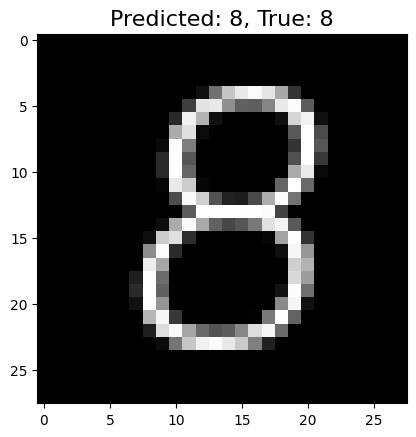

In [20]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

I'm using some Python code to select a random sample from my test dataset `x_test`. First, a random index is generated using `np.random.choice(len(x_test))`, and then the corresponding sample is extracted from `x_test`.

Next, the true labels for all samples in the test dataset are retrieved by finding the index of the maximum value along axis 1 of `y_test`, assuming it's a one-hot encoded array. This gives the true classes for each sample. Then, the true label for the randomly selected sample is obtained using `y_true[random_idx]`.

Additionally, assuming `y_pred_classes` contains the predicted classes for each sample in the test dataset, the predicted class for the randomly selected sample is extracted using `y_pred_classes[random_idx]`.

To visualize this random sample, `plt.imshow()` is used to display the image, and the title is set to show the predicted class and the true class for this specific sample.

This code snippet helps inspect a random prediction from the model on the test dataset and compare it to the true label.


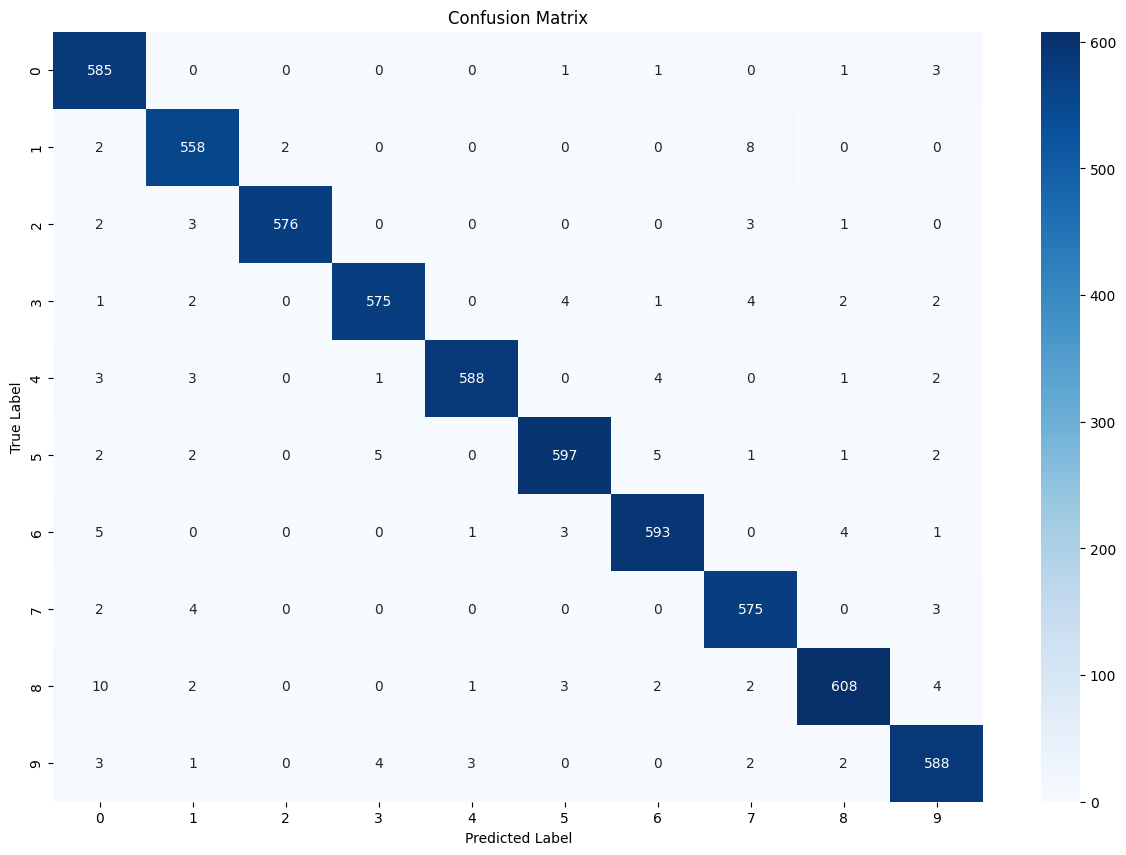

In [21]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

I'm currently examining a **Confusion Matrix**, which is a visualization tool I often use to assess the performance of my classification models in machine learning. Each row of this matrix corresponds to the true classes, and each column represents the predictions my model has made.

Here's how I read and interpret this matrix:

- The **diagonal cells** running from the top-left to the bottom-right represent the number of times my model predicted each class correctly. For instance, my model predicted '0' correctly 585 times. The numbers along this diagonal are quite high, which indicates that my model is largely accurate.

- The **non-diagonal cells** show where my model made incorrect predictions. For example, the '2' in the first row, second column indicates two instances where the actual class was '0' but my model predicted '1' instead.

- The **color intensity** in each cell corresponds to the number of predictions, with darker shades denoting higher numbers. This visual aid is fantastic for quickly spotting which classes get mixed up the most.

Given that the labels range from '0' to '9', it's clear that my model is tasked with classifying digits, which is quite a standard problem in the field of machine learning.

From this matrix, I can draw some insights:

- The bulk of my model's predictions are correct since most numbers are concentrated along the diagonal.

- There are noticeable patterns of misclassification. For example, digit '8' tends to be confused with '0' and '3' more often than others.

- Certain digits like '1', '4', '5', '7', and '9' are being predicted with slightly less accuracy, suggesting these might be areas where my model needs refinement.

This matrix is incredibly useful for identifying how my model performs across different classes and indicates where I might focus on improving its accuracy.


In [22]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [23]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

I've written a snippet of code that visualizes the predictions made by my machine learning model. Here's a step-by-step explanation of what I am doing:

1. First, I use the `predict` method on my model with `x_test` as input to obtain the predicted classes for the test set. The `predicted_classes` variable holds these predictions.

2. I then import the `matplotlib.pyplot` module, which is a plotting library that I use to visualize data - very handy for checking the results visually.

3. I want to sample a small set of images to inspect, so I set `num_images` to 10, meaning I'll look at 10 images from my test set.

4. To get a random selection of images, I use `np.random.randint` to generate 10 random indices from my test dataset (`x_test`). The `random_test_images` variable holds these indices.

5. Using `plt.figure`, I set up a figure with a width of 15 inches and a height of 5 inches, which gives me enough room to display all 10 images side by side.

6. Then, I loop over the indices I just generated. Inside the loop, I do the following for each image:
    - I use `plt.subplot` to create a subplot for each image. Since I want them in a single row, I specify 1 row and as many columns as there are images.
    - I display each image using `plt.imshow`. The images are reshaped to 28x28 because that's the dimension of the images in the dataset. I also set the colormap to 'gray' to show the images in grayscale.
    - I remove the axis with `plt.axis('off')` because they're unnecessary; I'm only interested in the image content.
    - I calculate the predicted label by using `np.argmax` on the prediction for the current image, which gives me the index of the highest value in the predictions array, corresponding to the predicted class.
    - I extract the true label by doing the same on the actual label data (`y_test`).
    - Finally, I set the title of each subplot to show the predicted and true labels. I use a green title if the prediction is correct (predicted label equals true label) and red if the prediction is incorrect.

7. After setting up all subplots, I display the figure with `plt.show()`. This will pop up a window with my images and the predictions, allowing me to quickly assess how well my model is performing visually.


187/187 [==============================] - 0s 2ms/step


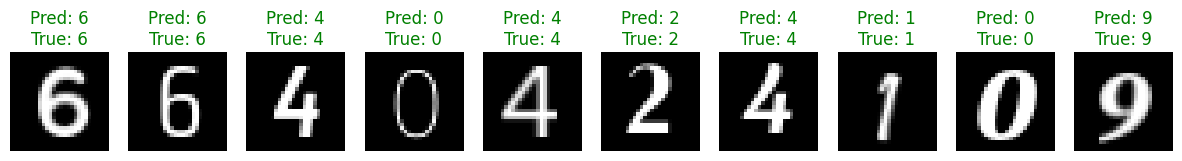

In [32]:
predicted_classes = model.predict(x_test)

import matplotlib.pyplot as plt

num_images = 10
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

plt.figure(figsize=(15, 5))
for i, image_idx in enumerate(random_test_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[image_idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

    predicted_label = np.argmax(predicted_classes[image_idx])

    true_label = np.argmax(y_test[image_idx])

    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=("green" if predicted_label == true_label else "red"))

plt.show()


# References

1. https://www.turing.com/kb/mathematical-formulation-of-feed-forward-neural-network
2. https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a
3. https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/
4. https://www.kaggle.com/code/swamita/building-cnns-from-scratch-in-pytorch
5. https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy
6. https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist/code?select=TMNIST_Data.csv
7. https://www.kaggle.com/code/anasbaig10/tmnist-typeface-anas-baig

# License

MIT License

Copyright (c) 2024 Shraddha Bhandarkar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.